In [23]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from PIL import Image

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.reshape(-1, 28, 28, 1) / 255.0
xtest = xtest.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(ytrain, 10)
y_test = to_categorical(ytest, 10)

In [16]:


model = Sequential()
model.add(Conv2D(32, kernel_size=5, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2, padding="same"))
model.add(Conv2D(64, kernel_size=5, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2, padding="same"))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, y_train, batch_size=100, epochs=5, validation_data=(xtest, y_test))

print("Train Accuracy:", model.evaluate(xtrain, y_train)[1])
print("Test Accuracy:", model.evaluate(xtest, y_test)[1])




Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 92s 149ms/step - accuracy: 0.9052 - loss: 0.2972 - val_accuracy: 0.9847 - val_loss: 0.0462
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 87s 145ms/step - accuracy: 0.9873 - loss: 0.0440 - val_accuracy: 0.9876 - val_loss: 0.0385
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 90s 149ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 86s 143ms/step - accuracy: 0.9946 - loss: 0.0181 - val_accuracy: 0.9912 - val_loss: 0.0296
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 84s 140ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9937 - val_loss: 0.0225
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9982 - loss: 0.0056
Train Accuracy: 0.9979666471481323
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9910 - loss: 0.0291
Test Accuracy: 0.9937000274658203


In [19]:
model.save('mnist_cnn_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('mnist_cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image = 1 | True = 7 | Predicted = 7


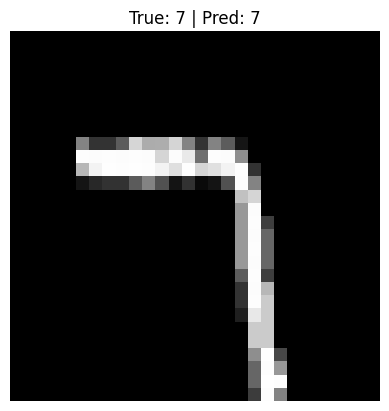

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image = 2 | True = 2 | Predicted = 2


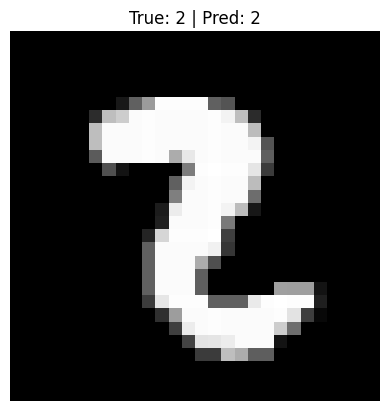

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image = 3 | True = 5 | Predicted = 5


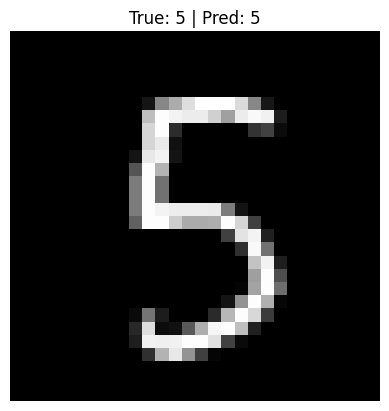

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image = 4 | True = 2 | Predicted = 2


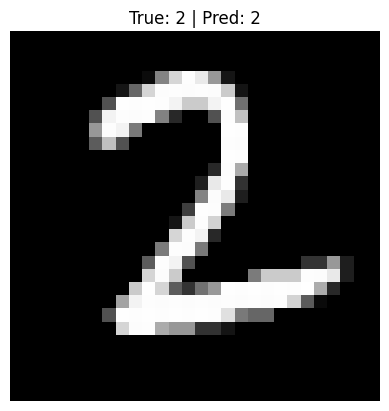

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image = 5 | True = 7 | Predicted = 7


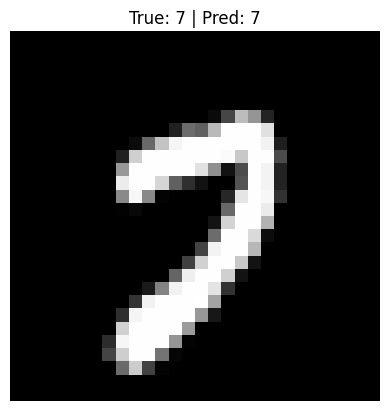

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image = 6 | True = 6 | Predicted = 6


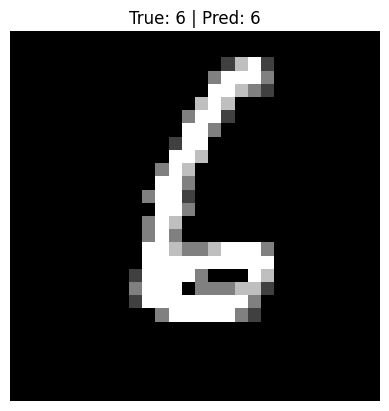

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image = 7 | True = 7 | Predicted = 7


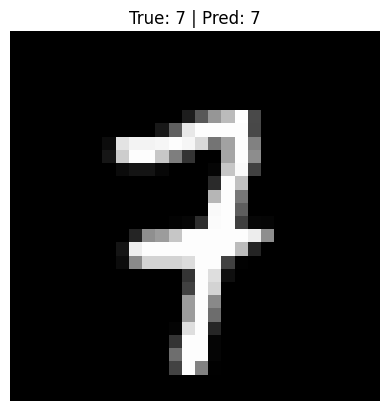

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image = 8 | True = 9 | Predicted = 9


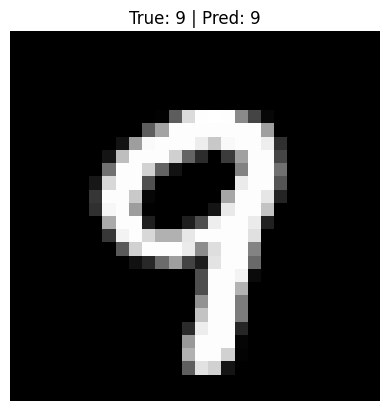

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image = 9 | True = 8 | Predicted = 8


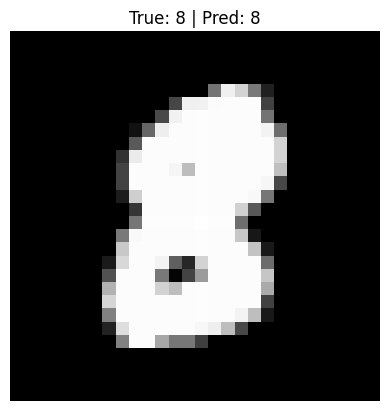

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image = 10 | True = 4 | Predicted = 4


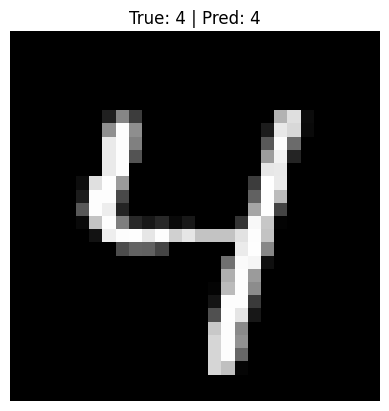

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

random_indices = random.sample(range(len(xtest)), 10)

for i, idx in enumerate(random_indices):
    img = xtest[idx].reshape(1, 28, 28, 1)
    true_label = np.argmax(y_test[idx])
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    print("Image =", i+1, "| True =", true_label, "| Predicted =", predicted_digit)

    plt.imshow(xtest[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label} | Pred: {predicted_digit}")
    plt.axis('off')
    plt.show()
